## Varianz und Standardabweichung
----------------------------------------

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
import random
#import scipy
from scipy import stats
from scipy.stats import norm,gaussian_kde
#import ipywidgets as widgets
#from IPython.display import display
#import seaborn as sns

#%run ../src/notebook_env.py

Die **Varianz** ist die Summe der quadrierten Abweichungen vom Mittelwert. Die Varianz für Populationsdaten wird mit $\sigma^2$ bezeichnet (gelesen als Sigma-Quadrat), und die für Stichprobendaten berechnete Varianz wird mit $s^2$ bezeichnet. <br> <br> $$ \sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{N} $$  <br> <br> und  <br> <br> $$ s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1} $$ <br> <br> wobei $\sigma^2$ die Varianz der Grundgesamtheit und $s^2$ die Stichprobenvarianz ist. Die Größe $x_i-\mu$ oder $x_i-\bar{x}$ in den obigen Formeln wird als die Abweichung des $x_i$-Wertes $(x_1,x_2, \dots ,x_n)$ vom Mittelwert bezeichnet (Mann 2012). <br> <br> Die <a href="https://en.wikipedia.org/wiki/Standard_deviation">Standardabweichung</a> ist das gebräuchlichste Maß für die Streuung. Der Wert der Standardabweichung gibt an, wie eng die Werte eines Datensatzes um den Mittelwert herum gestreut sind. Im Allgemeinen zeigt ein niedriger Wert der Standardabweichung für einen Datensatz an, dass die Werte dieses Datensatzes über einen relativ kleineren Bereich um den Mittelwert herum verteilt sind. Im Gegensatz dazu zeigt ein größerer Wert der Standardabweichung für einen Datensatz an, dass die Werte dieses Datensatzes über einen relativ größeren Bereich um den Mittelwert herum gestreut sind (Mann 2012). <br> <br> 
![Alt-Text](standarddev.png) <br> <br>

Die Standardabweichung erhält man durch Ziehen der Quadratwurzel aus der **Varianz**. Folglich wird die für Grundgesamtheitsdaten berechnete Standardabweichung mit $\sigma$ und die für Stichprobendaten berechnete Standardabweichung mit $s$ bezeichnet. <br> <br> $$ \sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^2}{N}} $$ <br> <br> und <br> <br> $$ s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}} $$ <br> <br> wobei $\sigma$ die Standardabweichung der Grundgesamtheit und $s$ die Standardabweichung der Stichprobe ist. <br> <br> <br> <br> Als Übung berechnen wir für einige numerische Variablen, die im `students_quant`-Datensatz von Interesse sind, den Mittelwert, den Median, die Varianz und die Standardabweichung und stellen sie in einem schönen Format dar.

In [10]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen; nur name, age, nc.score, height und weight Spalten werden ausgewählt
students = pd.read_csv('students.csv', index_col=0,usecols=['name','age',
                                                            'nc.score','height','weight'])

# Gebe ersten 10 Werte aus 
students.head(10)

,name,age,height,weight,nc.score
1,"Gonzales, Christina",19,160,64.8,1.91
2,"Lozano, T'Hani",19,172,73.0,1.56
3,"Williams, Hanh",22,168,70.6,1.24
4,"Nem, Denzel",19,183,79.7,1.37
5,"Powell, Heather",21,175,71.4,1.46
6,"Perez, Jadrian",19,189,85.8,1.34
7,"Clardy, Anita",21,156,65.9,1.11
8,"Allen, Rebecca Marie",21,167,65.7,2.03
9,"Tracy, Robert",18,195,94.4,1.29
10,"Nimmons, Laura",18,165,66.0,1.19


In [11]:
print('Mittelwerte :')
students_mean = students.mean(numeric_only=True)
students_mean

Mittelwerte :


age          22.541571
height      171.380750
weight       72.998131
nc.score      2.166481
dtype: float64

In [12]:
print('Median :')
students_median = students.median(numeric_only=True)#
students_median

Median :


age          21.00
height      171.00
weight       71.80
nc.score      2.04
dtype: float64

In [13]:
print('Varianz :')
students_var = students.var(numeric_only=True)
students_var

Varianz :


age          36.785568
height      122.711652
weight       74.566017
nc.score      0.658610
dtype: float64

In [14]:
print('Standardabweichung :')
students_std = students.std(numeric_only=True)
students_std

Standardabweichung :


age          6.065111
height      11.077529
weight       8.635162
nc.score     0.811548
dtype: float64

In [15]:
students_stats = pd.DataFrame({'Mittelwerte':students_mean,'Median':students_median,'Varianz':students_var,'Standardabweichung':students_std})
students_stats

,Mittelwerte,Median,Varianz,Standardabweichung
age,22.541571,21.00,36.785568,6.065111
height,171.380750,171.00,122.711652,11.077529
weight,72.998131,71.80,74.566017,8.635162
nc.score,2.166481,2.04,0.658610,0.811548


### Verwendung der Standardabweichung
Mit Hilfe des **Mittelwerts** und der **Standardabweichung** lässt sich der Anteil oder Prozentsatz der Gesamtbeobachtungen ermitteln, die in ein bestimmtes Intervall um den Mittelwert fallen.

#### Tschebyscheff-Theorem
Das <a href="https://en.wikipedia.org/wiki/Chebyshev%27s_inequality">Tschebyscheff-Theorem</a> gibt eine untere Schranke für die Fläche unter einer Kurve zwischen zwei Punkten, die auf gegenüberliegenden Seiten des Mittelwerts und im gleichen Abstand vom Mittelwert liegen.

#### Für jede Zahl $k$, die größer als $1$ ist, liegen mindestens $1-\frac{1}{k^2}$ der Datenwerte innerhalb von $k$ Standardabweichungen vom Mittelwert.

Lassen Sie uns Python verwenden, um ein Gefühl für den Tschebyscheff-Satz zu bekommen.

In [16]:
x=np.arange(1.0,4.1,0.1)
x_werte=[]
k_werte=[]
for n in x:
    x_werte.append((round(n,2)))
    k_werte.append((1-1/(round(n,2))**2)*100)

df4 = pd.DataFrame(list(zip(x_werte,k_werte)), columns = ['x','k'])
df4

,x,k
0,1.0,0.000000
1,1.1,17.355372
2,1.2,30.555556
3,1.3,40.828402
4,1.4,48.979592
5,1.5,55.555556
6,1.6,60.937500
7,1.7,65.397924
8,1.8,69.135802
9,1.9,72.299169


Um es in Worte zu fassen: Für $k=2$ bedeutet das, dass mindestens **$75 \% $** der Datenwerte innerhalb von **2 Standardabweichungen** vom Mittelwert liegen. <br> <br> Stellen wir das Tschebyscheff-Theorem mit Python dar: 

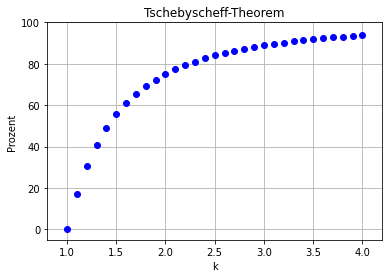

In [17]:
# Label für die x,y-Achse vergeben:
plt.title('Tschebyscheff-Theorem')
plt.ylabel('Prozent')
plt.xlabel('k')
# Einen x-y-Plot erstellen:
plt.plot(x_werte, k_werte, 'bo')

# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0.8, 4.2, -5, 100])

# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)

# Diagramm anzeigen:
plt.show()

Das Theorem gilt sowohl für Stichproben- als auch für Grundgesamtheitsdaten. Das Tschebyscheffsche Theorem gilt für Verteilungen beliebiger Form. Es kann jedoch nur für $k > 1$ verwendet werden. Denn wenn $k=1$ ist, ist der Wert von $1-\frac{1}{k^2}$ Null, und wenn $k < 1$ ist, ist der Wert von $1-\frac{1}{k^2}$ negativ (Mann 2012). 

#### Empirische Regel
Während das Tschebyscheffsche Theorem auf jede Art von Verteilung anwendbar ist, gilt die **empirische Regel** nur für eine bestimmte Art von Verteilung, die so genannte **Gaußverteilung** oder **Normalverteilung**. Es gibt 3 Regeln: <br> <br> Bei einer Normalverteilung sind   

1.  $68 \%$ der Beobachtungen innerhalb einer Standardabweichung des Mittelwerts.
2.  $95 \%$ der Beobachtungen innerhalb von zwei Standardabweichungen des Mittelwerts.
3.  $99,7 \%$ der Beobachtungen innerhalb von drei Standardabweichungen des Mittelwerts.



Da wir inzwischen über genügend Hacking-Power verfügen, werden wir versuchen zu testen, ob die drei Regeln gültig sind. 

**(1) Erstens** werden wir die Funktion `random.normal()` in Python erforschen, um normalverteilte Daten zu erzeugen, und 

**(2) Zweitens** werden wir zu unserem `students` Datensatz zurückkehren und diese Regeln an diesem Datensatz zu validieren. 
<br> <br> Die Normalverteilung gehört zur Familie der <a href="https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution">stetigen Verteilungen</a>. In Python gibt es eine Vielzahl von Wahrscheinlichkeitsverteilungen <a href="https://en.wikibooks.org/wiki/R_Programming/Probability_Distributions">(hier)</a>. Um Daten aus einer Normalverteilung zu erzeugen, kann man die Funktion `random.normal()` verwenden, die ein Zufallsvariablengenerator für die Normalverteilung ist. <br> <br> Mit der Funktion `random.sample()` können wir `n` Werte aus einer Normalverteilung mit einem gegebenen Mittelwert (Standard ist 0) und einer Standardabweichung (Standard ist 1) entnehmen: `random.normal(loc=0.0, scale=1.0)`. Lassen Sie uns das ausprobieren:

In [18]:
data = np.random.normal(loc=0.0, scale=1.0, size=200)
data=list(data)
probe = random.sample(data, 1)
probe

[-1.6123234429162412]

In [19]:
probe = random.sample(data, 1)
print(probe)

[1.224420747850113]


In [20]:
probe = random.sample(data, 1)
print(probe)

[0.40267542831494535]


In [21]:
probe = random.sample(data, 1)
print(probe)

[0.17706274237628905]


Wir sehen, dass die Funktion `random.sample()` <a href="https://en.wikipedia.org/wiki/Pseudorandom_number_generator">(Pseudo-)Zufallszahlen</a> liefert. Wir können die Funktion ziemlich einfach bitten, Hunderte oder Tausende oder noch mehr (Pseudo-)Zufallszahlen zu ziehen:

In [22]:
probe = random.sample(data, 10)
print(probe)

[0.1844542107270887, 0.3257370217797091, -0.6507863949288677, 1.5714154393074637, 1.6329798111763107, 0.5105063484855111, 0.470336241689103, 0.26656393735471995, 0.9876366590542683, -1.7430730540093982]


In [23]:
probe = random.sample(data, 100)
print(probe)

[-1.4073788023379417, 1.3285263614382148, 1.2402195586897833, 0.9173264113379527, -0.715704924930613, 0.1680444669930124, 0.9840369458760276, -0.07610842357834371, 1.310819894588076, -2.300921962414157, -0.5907224691580767, 0.40230067679915227, -0.5962874162340589, 0.9876366590542683, -0.25431042263069487, 1.2225250364286153, 0.09402190454328946, -1.351303292977526, 0.47505844371081946, -0.06373895716339299, -0.6197410329211998, 0.6639063788988441, -1.134343293319908, 0.5780354039565591, 0.9933357835971145, -1.5622703413352446, 0.40267542831494535, 1.56637269363007, 0.041338646319746125, -1.8945720702750013, 0.8263938499999339, 0.9891378224865961, 0.19199084016960152, 2.6314574644542814, 0.4720570000448644, 0.321731137559557, 0.9322470140083344, 0.5553767373127554, -0.09592834254114259, -0.30044252323653453, -1.523053312138818, -0.042587379562111956, 0.04087550628677586, -0.5061551284483119, -1.8420770758513918, 1.6805544679853293, -0.3377216469081863, 0.174264995857927, -0.43082529424

In [24]:
y_norm = np.random.normal(loc=0.0, scale=1.0, size=100000)

Wenn wir ein Histogramm dieser Zahlen erstellen, sehen wir die namensgebende glockenförmige Verteilung.

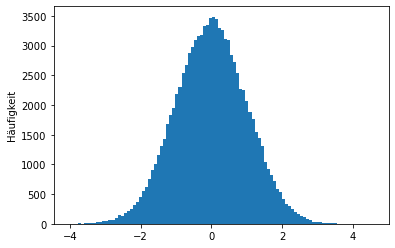

In [28]:
plt.hist(y_norm, bins = 100)
plt.ylabel('Häufigkeit')
plt.show()

Wir kennen bereits den Mittelwert und die Standardabweichung der Werte in der `y_norm` Liste, da wir die Funktion `random.normal()` explizit mit `mean=0` und `sd=1` aufgerufen haben. Wir müssen also nur die Zahlen der `y_norm` Liste zählen, die größer als $-1$ bzw. kleiner als $1$ und $2$ bzw. $-2$ und $3$ bzw. $-3$ sind, und sie zur Länge der Liste, in unserem Fall $100.000$, in Beziehung setzen, um die drei oben genannten Regeln zu bestätigen.

In [30]:
# Berechne Anzahl der Werte < 1 - Anzahl der Werte <-1 durch Gesamtanzahl
sd1 = ((sum(y_norm<1)-sum(y_norm<-1))*100)/len(y_norm)

# Berechne Anzahl der Werte < 2 - Anzahl der Werte <-2 durch Gesamtanzahl
sd2 = ((sum(y_norm<2)-sum(y_norm<-2))*100)/len(y_norm)

# Berechne Anzahl der Werte < 3 - Anzahl der Werte <-3 durch Gesamtanzahl
sd3 = ((sum(y_norm<3)-sum(y_norm<-3))*100)/len(y_norm)

print('sd1 :',sd1)
print('sd2 :',sd2)
print('sd3 :',sd3)

sd1 : 67.938
sd2 : 95.458
sd3 : 99.741


Perfekte Übereinstimmung! Die drei empirischen Regeln sind offensichtlich gültig. Um unsere Ergebnisse zu veranschaulichen, stellen wir das Histogramm erneut dar und fügen einige Anmerkungen hinzu. Bitte beachten Sie, dass wir in der `hist()`-Funktion das Argument `density=True` setzen. Dies hat zur Folge, dass das resultierende Histogramm nicht mehr die Zählungen auf der y-Achse anzeigt, sondern die **Dichtewerte** (normalisierte Zählung geteilt durch Bin-Breite), was bedeutet, dass sich die Balkenbereiche zu 1 summieren.

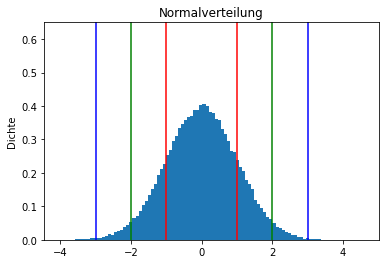

In [32]:
plt.hist(y_norm, bins = 100, density=True)
#fig, ax = plt.subplots()

plt.ylim(0,0.65)
plt.axvline(1, color ='red', lw = 2, alpha = 0.75)
plt.axvline(-1, color ='red', lw = 2, alpha = 0.75)
plt.axvline(2, color ='green', lw = 2, alpha = 0.75)
plt.axvline(-2, color ='green', lw = 2, alpha = 0.75)
plt.axvline(3, color ='blue', lw = 2, alpha = 0.75)
plt.axvline(-3, color ='blue', lw = 2, alpha = 0.75)
plt.title('Normalverteilung')
plt.ylabel('Dichte')
plt.show()

Nun, lassen Sie uns an der **zweiten** Aufgabe arbeiten: Überprüfen Sie die drei empirischen Regeln anhand des `students` Datensatzes. Dazu müssen wir überprüfen, ob eine der numerischen Variablen im Studentendatensatz  normalverteilt ist. Wir beginnen mit der Extraktion numerischer Variablen von Interesse aus dem `students` Datensatz. Dann zeichnen wir Histogramme und beurteilen, ob die Variable normalverteilt ist oder nicht. Zunächst überprüfen wir jedoch den Datensatz, indem wir die Funktion `head()` aufrufen.

In [34]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen; nur 'age','nc.score','height','weight','score1','score2','salary' Spalten werden ausgewählt
students_hist = pd.read_csv('students.csv', index_col=0,usecols=
                            ['age','nc.score','height','weight','score1','score2','salary'])

# Gebe ersten 10 Werte aus 
students_hist.head(10)

,age,height,weight,nc.score,score1,score2,salary
1,19,160,64.8,1.91,NaN,NaN,NaN
2,19,172,73.0,1.56,NaN,NaN,NaN
3,22,168,70.6,1.24,45.0,46.0,NaN
4,19,183,79.7,1.37,NaN,NaN,NaN
5,21,175,71.4,1.46,NaN,NaN,NaN
6,19,189,85.8,1.34,NaN,NaN,NaN
7,21,156,65.9,1.11,NaN,NaN,NaN
8,21,167,65.7,2.03,58.0,62.0,NaN
9,18,195,94.4,1.29,57.0,67.0,NaN
10,18,165,66.0,1.19,NaN,NaN,NaN


Um einen Überblick über die Form der Verteilung der einzelnen Variablen zu erhalten, verwenden wir die Funktion `hist()`.

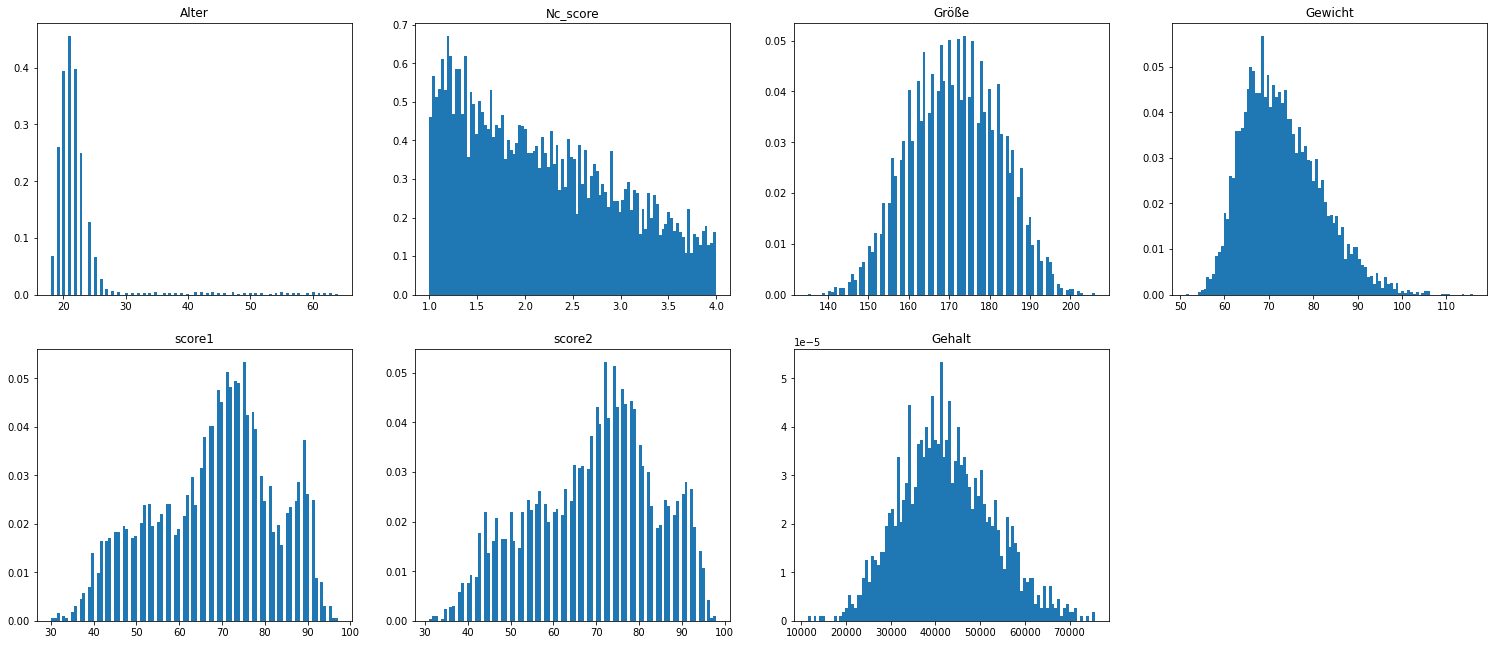

In [40]:
fig = plt.figure(figsize=(26,11))

ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)

# Histogramm Alter
ax1.hist(students_hist['age'], bins = 100, density=True)
ax1.set_title('Alter')

# Histogramm Nc_score
ax2.hist(students_hist['nc.score'], bins = 100, density=True)
ax2.set_title('Nc_score')

# Histogramm Größe
ax3.hist(students_hist['height'], bins = 100, density=True)
ax3.set_title('Größe')


# Histogramm Gewicht
ax4.hist(students_hist['weight'], bins = 100, density=True)
ax4.set_title('Gewicht')


# Histogramm score1
ax5.hist(students_hist['score1'], bins = 100, density=True)
ax5.set_title('score1')


# Histogramm score2
ax6.hist(students_hist['score2'], bins = 100, density=True)
ax6.set_title('score2')


# Histogramm Gehalt
ax7.hist(students_hist['salary'], bins = 100, density=True)
ax7.set_title('Gehalt')

plt.show()
fig.tight_layout()


Wir stellen sofort fest, dass einige Variablen positiv verzerrt sind, also schließen wir sie aus und behalten diejenigen, die normal verteilt zu sein scheinen.

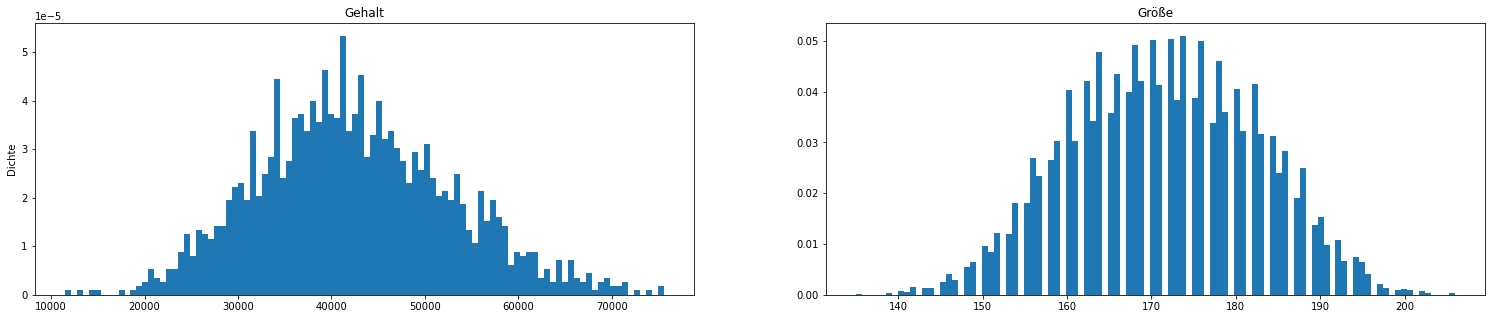

In [47]:

fig = plt.figure(figsize=(26,11))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
# Histogramm Gehalt
ax1.hist(students_hist['salary'], bins = 100, density=True)
ax1.set_title('Gehalt')
ax1.set_ylabel('Dichte')
# Histogramm Größe
ax2.hist(students_hist['height'], bins = 100, density=True)
ax2.set_title('Größe')

plt.show()

Nun, sowohl die Variable `height` als auch die Variable `salary` scheinen mehr oder weniger normalverteilt zu sein. Es ist also eine Frage des Geschmacks, welche Variable man für die weitere Analyse auswählt. Für den Moment bleiben wir bei der Gehaltsvariable und überprüfen, ob die drei oben genannten empirischen Regeln gültig sind. Wir wechseln zu Python und validieren diese Regeln, indem wir zunächst den Mittelwert und die Standardabweichungen berechnen. Bitte beachten Sie, dass die Gehaltsvariable leere Zellen enthält, die mit `NA` gekennzeichnet sind. Daher schließen wir zunächst alle `NA`-Werte aus, indem wir die Funktion `dropna()` anwenden.

In [48]:
salary_df = students_hist['salary']
salary_df

1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
            ...     
8235    36750.087135
8236             NaN
8237             NaN
8238    40112.041834
8239    45900.134459
Name: salary, Length: 8239, dtype: float64

In [49]:
salary_clean = salary_df.dropna()
salary_clean

11      45254.108021
13      40552.790243
14      27007.030294
17      33969.159268
28      50617.641870
            ...     
8229    33259.703079
8234    41028.241341
8235    36750.087135
8238    40112.041834
8239    45900.134459
Name: salary, Length: 1753, dtype: float64

In [50]:
print('Mittelwert des Gehalts :',salary_clean.mean())
print('1 Standardabweichung des Gehalts :',salary_clean.std())
print('2 Standardabweichung des Gehalts :',2*salary_clean.std())
print('3 Standardabweichung des Gehalts :',3*salary_clean.std())

Mittelwert des Gehalts : 42522.112364224806
1 Standardabweichung des Gehalts : 10333.139905546619
2 Standardabweichung des Gehalts : 20666.279811093238
3 Standardabweichung des Gehalts : 30999.41971663986


Wie in der obigen allgemeinen Beispielform zählen wir die Anzahl der Werte, die größer als $+1$ s.d. bzw. kleiner als $-1$ s.d. und $+2$ s.d. bzw. $-2$ s.d. und $+3$ s.d. bzw. $-3$ s.d. sind, und setzen sie in Beziehung zur Länge des Vektors, in unserem Fall $1753$.

In [51]:
salary_std = salary_clean.std()
salary_mean = salary_clean.mean()
# Berechne Anzahl der Werte < (salary_mean+salary_std) - Anzahl der Werte < (salary_mean-salary_std) durch Gesamtanzahl
salsd1 = ((sum(salary_clean<(salary_mean+salary_std))-sum(salary_clean<(salary_mean-salary_std)))*100)/len(salary_clean)

# Berechne Anzahl der Werte < (salary_mean+2*salary_std) - Anzahl der Werte < (salary_mean-2*salary_std) durch Gesamtanzahl
salsd2 = ((sum(salary_clean<(salary_mean+2*salary_std))-sum(salary_clean<(salary_mean-2*salary_std)))*100)/len(salary_clean)

# Berechne Anzahl der Werte < (salary_mean+3*salary_std) - Anzahl der Werte < (salary_mean-3*salary_std) durch Gesamtanzahl
salsd3 = ((sum(salary_clean<(salary_mean+3*salary_std))-sum(salary_clean<(salary_mean-3*salary_std)))*100)/len(salary_clean)

print('salsd1 :',salsd1)
print('salsd2 :',salsd2)
print('salsd3 :',salsd3)

salsd1 : 67.08499714774672
salsd2 : 95.60752994865945
salsd3 : 99.7718197375927


Wow, ziemlich nah dran! Offensichtlich zeigt die Gehaltsvariable eine starke Tendenz zur Unterstützung der so genannten empirischen Regel. Wir stellen das Histogramm für die Variable `salary` dar, um unseren Eindruck zu bestätigen. Für einen besseren visuellen Eindruck färben wir die Standardabweichungen ein.

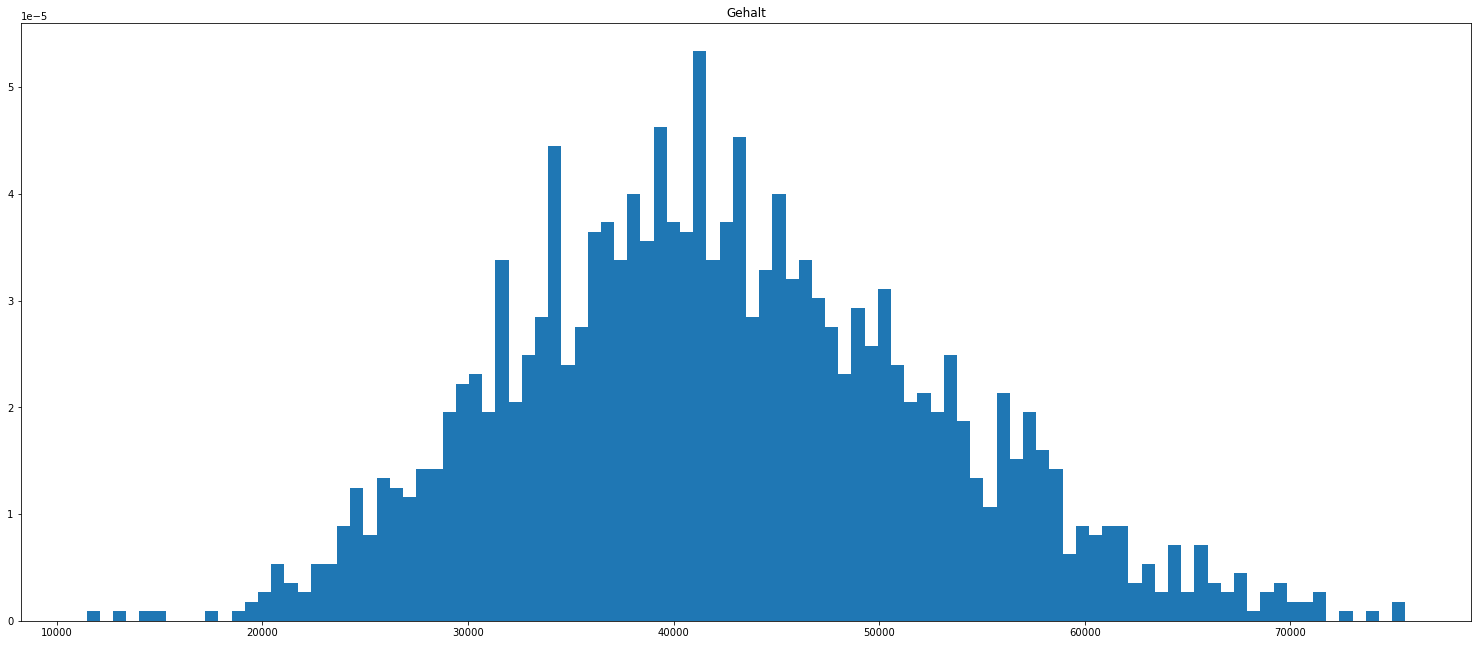

In [62]:
# Histogramm Gehalt
fig = plt.figure(figsize=(26,11))
ax1 = fig.add_subplot(111)
ax1.hist(students_hist['salary'], bins = 100, density=True)
#ax1.fill_between(x, y1)
plt.title('Gehalt')
plt.show()

Wir können nun unseren Visualisierungsansatz erweitern, indem wir die **empirische Dichteschätzung** mit der Funktion `scipy_kernel.evaluate()` grafisch darstellen und ihre Form überprüfen. Wir stellen die empirische Dichteschätzung als gestrichelte Linie dar, indem wir das <a href="http://www.cookbook-r.com/Graphs/Shapes_and_line_types/">(Linientyp-Argument)</a> `'--'` und eine Linienbreite von 3 (Argument `linewidth=3.0`) setzen.

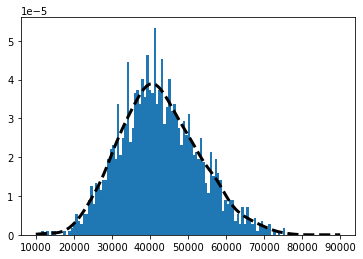

In [64]:
# Erzeuge Fit für salary_clean_list
x_salary = np.linspace(10000,90000,100)
scipy_kernel = gaussian_kde(salary_clean)
v = scipy_kernel.evaluate(x_salary)

# Plotte das Histogramm und Pdf
plt.hist(salary_clean, bins=100, density=True)
plt.plot(x_salary,v,'k--',linewidth=3.0)
plt.show()

Schließlich vergleichen wir unsere **empirische Dichteschätzung** mit der theoretischen **Wahrscheinlichkeitsdichtefunktion**, die auf dem tatsächlichen Mittelwert und der Standardabweichung der Daten `salary` basiert. Für einen besseren visuellen Vergleich wechseln wir zurück zu einer nicht eingefärbten Histogramm-Darstellung.

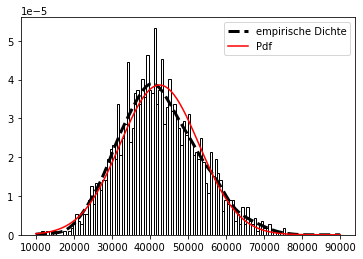

In [69]:
# Erzeuge Normalverteilung
x_salary = np.linspace(10000,90000,100)
pdf_result = stats.norm.pdf(x_salary,loc=salary_clean.mean(),scale=salary_clean.std())

# Erzeuge Fit für salary_clean
scipy_kernel = gaussian_kde(salary_clean)
v = scipy_kernel.evaluate(x_salary)
#plt.plot(x_salary,pdf_result)

# Plotte das Histogramm, Normalverteilung und Pdf
plt.xlabel= ('Jahresgehalt in Euro')
plt.ylabel= ('Dichte')
plt.hist(salary_clean, bins=100, density=True, color = 'white', edgecolor = 'k')
plt.plot(x_salary,v,'k--',linewidth=3.0, label ='empirische Dichte')
plt.plot(x_salary,pdf_result,'red', label = 'Pdf')
plt.legend()
plt.show()

Wir können daraus schließen, dass `salary` im Datensatz der `students` ungefähr normalverteilt ist. Die Grafik zeigt jedoch, dass die Verteilung der Gehaltsvariablen leicht nach links geneigt ist. Dies ist an der geringen Abweichung zwischen der **empirischen Dichteschätzung** und der **Wahrscheinlichkeitsdichtefunktion** zu erkennen.